<h1 style="color:blue"> TL1 - punto a) Regresión Lineal </h1> 

In [24]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#### Importo el dataset e interpretó la informacion contenida

In [25]:
#Importo las librerias: Pandas y Numpy
import pandas as pd 
import numpy as np
dataset = pd.read_csv('TL_N°1_mediciones_csv_Datos_Presión.csv', names = ("Presion 1","Presion 2"), dtype = {'Presion 1': np.float64, 'Presion 2': np.float64})

#### Analizo el comportamiento del modelo de datos

In [26]:
#verifico la informacion contenida en el dataset
print("Informacion en el dataset: ")
print(dataset.head(10))

Informacion en el dataset: 
   Presion 1  Presion 2
0    1000.83    1000.33
1    1000.64    1000.24
2    1000.81    1000.48
3    1000.80    1000.56
4    1001.28    1001.01
5    1001.69    1001.47
6    1002.02    1001.77
7    1001.64    1001.44
8    1001.17    1001.06
9    1001.52    1001.31


In [27]:
import statistics as stats

#Se obtiene la media de los 2 datasets
media_p1 = stats.mean(dataset["Presion 1"])
media_p2 = stats.mean(dataset["Presion 2"])

print("Media Dataset 1: ", media_p1, "\nMedia Dataset 2: ", media_p2)

#Se obtiene el desvio estandar de los 2 datasets
desvio_p1 = stats.stdev(dataset["Presion 1"])
desvio_p2 = stats.stdev(dataset["Presion 2"])

print("\nDesvio Dataset 1: ", desvio_p1, "\nDesvio Dataset 2: ", desvio_p2)

X = dataset["Presion 1"]
y = dataset["Presion 2"]

Media Dataset 1:  1016.5804504504505 
Media Dataset 2:  1016.8418318318319

Desvio Dataset 1:  6.96285228344962 
Desvio Dataset 2:  7.05816186024652


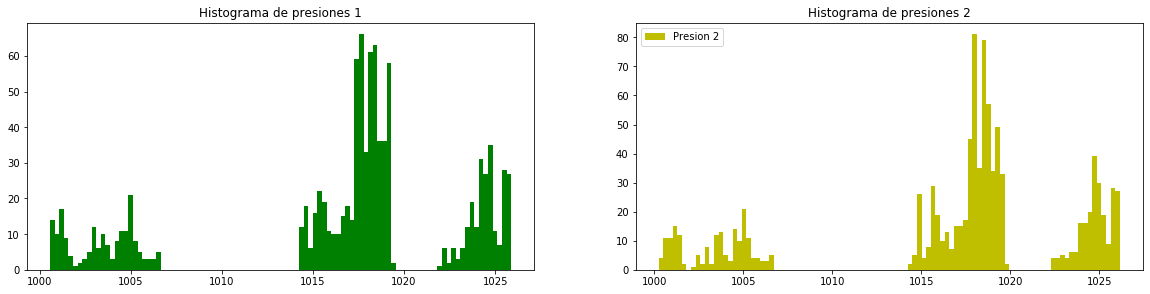

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))

plt.subplot(221)
plt.title("Histograma de presiones 1")
plt.hist(X, bins = 100, color = 'g')
plt.subplot(222)
plt.title("Histograma de presiones 2")
plt.hist(y, bins = 100, color = 'y', label = "Presion 2")
plt.legend(loc=2)
plt.show()

##### Como puede observarse en los histogramas tanto las presiones calculadas en el punto a como las presiones calculadas en el punto b, no siguen un comportamiento lineal ya que los datos estan bastante dispersos y la poblacion es heterogena

#### A continuación, Se procede a ver la relacion de las presiones p1(p2) para ver si representa un comportamiento lineal

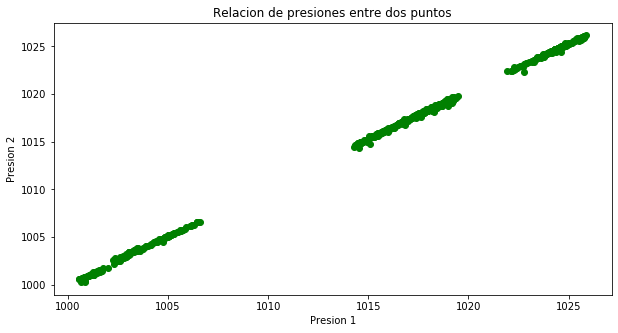

In [29]:
#Grafico los datos junto con el modelo
plt.figure(figsize = (10,5))
plt.scatter(X, y, color = 'g')
plt.title('Relacion de presiones entre dos puntos')
plt.xlabel('Presion 1')
plt.ylabel('Presion 2')
plt.show()

##### Como puede observarse graficando la relacion de presiones en el datacenter sigue una distribucion lineal, y practicamente no existe una tasa de error grande ya que la distancia entre ambos puntos es minima., con lo cual se interpreta un comportamiento lineal

### IMPLEMENTACION DE REGRESION LINEAL SIMPLE

In [30]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

#separo los datos "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()

#Entreno el modelo
lr.fit(X_train, y_train)

#Realizo una prediccion con los datos de prueba
Y_pred = lr.predict(X_test)

In [32]:
#Calcular los datos de la pendiente o el coeficiente (a) y la interseccion (b) -> y = ax + b
print("Datos del modelo de Regresion Lineal Simple")

print("Valor de la pendiente o oeficiente 'a': ")
a = lr.coef_
print(a)

print("Valor de la interseccion: ")
b = lr.intercept_
print(b)

print("La Ecuacion del modelo es: ")
print('Y = ', a, 'X' ,b)

print("Precision del modelo: ")
print(lr.score(X_train, y_train))

Datos del modelo de Regresion Lineal Simple
Valor de la pendiente o oeficiente 'a': 
[[1.01361654]]
Valor de la interseccion: 
[-13.57718438]
La Ecuacion del modelo es: 
Y =  [[1.01361654]] X [-13.57718438]
Precision del modelo: 
0.9997626004004034


###### Como la precision del modelo es del 0.99.. casi 1 quiere decir que se comporta de manera lineal el modelo de regresión por lo tanto se puede predecir la variable p1 en funcion de p2

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, Y_pred)
print("Error Cuadratico medio (mse): ", mse)
rmse = np.sqrt(mse)


Error Cuadratico medio (mse):  0.01807784608398798


##### como puede observarse el error es del 0.01 practicamente los puntos entre p1 y p2 estan muy cercanos, siguiendo una distribucion lineal con poblacion homogenea, si se realiza un histograma puede observarse que la media esta entre "" y que sigue una distribucion uniforme

##### se grafica los valores reales del entrenamiento y los valores predecidos del entrenamiento

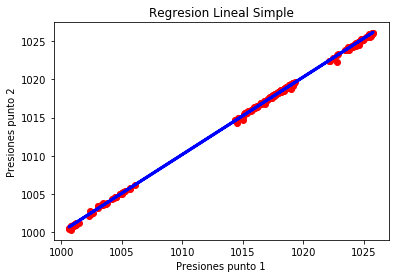

In [34]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.title('Regresion Lineal Simple')
plt.xlabel('Presiones punto 1')
plt.ylabel('Presiones punto 2')
plt.show()